In [1]:
import cv2
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow.keras as K
import tensorflow.keras.backend as Kback
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf

# Loading dataset for testing

In [2]:
test_datagen = K.preprocessing.image.ImageDataGenerator(rescale = 1./255)   

test_dataset  = test_datagen.flow_from_directory(directory = 'D:/RESEARCH/Circuit component recognition/test',
                                                   target_size = (160,160),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   shuffle=False,
                                                   batch_size = 64)

Found 2000 images belonging to 20 classes.


# The three best models for voting (snapshot 1,2 and DenseNet121_CBAM)

In [3]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = Kback.sum(Kback.round(Kback.clip(y_true * y_pred, 0, 1)))
    possible_positives = Kback.sum(Kback.round(Kback.clip(y_true, 0, 1)))
    predicted_positives = Kback.sum(Kback.round(Kback.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + Kback.epsilon())
    recall = true_positives / (possible_positives + Kback.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+Kback.epsilon())
    return f1_val

model0 = K.models.load_model("densenet121_cbam.hdf5", custom_objects={"f1_score": f1_score})
model1 = K.models.load_model("snapshot_model_1.h5", custom_objects={"f1_score": f1_score})
model2 = K.models.load_model("snapshot_model_2.h5", custom_objects={"f1_score": f1_score})

In [4]:
y_label = np.asarray(test_dataset.classes)
y_label = y_label.astype('int')

Y_pred = model0.predict_generator(test_dataset, 1157)
y_pred_0 = np.argmax(Y_pred, axis=1)
y_pred_0 = y_pred_0.astype('int')

Y_pred = model0.predict_generator(test_dataset, 1157)
y_pred_1 = np.argmax(Y_pred, axis=1)
y_pred_1 = y_pred_1.astype('int')

Y_pred = model0.predict_generator(test_dataset, 1157)
y_pred_2 = np.argmax(Y_pred, axis=1)
y_pred_2 = y_pred_2.astype('int')

C:\Users\aroy8\AppData\Local\Temp/ipykernel_2656/157313006.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model0.predict_generator(test_dataset, 1157)
Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 1157 batches). You may need to use the repeat() function when building your dataset.
C:\Users\aroy8\AppData\Local\Temp/ipykernel_2656/157313006.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model0.predict_generator(test_dataset, 1157)
Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 1157 batches). You may need to use the repeat()

In [16]:
def voting_max(arr1,arr2,arr3):
    arr = []
    for i in range(0,2000):
        if arr1[i] == arr2[i] or arr1[i] == arr3[i] or arr1[i] == arr2[i] == arr3[i]:
            arr.append(arr1[i])
        elif arr2[i] == arr3[i]:
            arr.append(arr2[i])
#         else:
#             arr.append(arr1[i])
    arr = np.asarray(arr)
    arr = arr.astype('int')
    return arr

In [17]:
y_pred = voting_max(y_pred_0, y_pred_1, y_pred_2)
print(y_pred)

[ 0  0  0 ...  3 19 19]


# Metrics of the voting 

In [18]:
#Making the Confusion Matrix
cm = confusion_matrix(y_label, y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])

#Accuracy
from sklearn.metrics import accuracy_score
print("Testing accuracy:")
print(accuracy_score(y_label, y_pred))
#F1_score
from sklearn.metrics import f1_score
print("Testing F1-score")
print(f1_score(y_label, y_pred, average = 'macro'))
#Precision
from sklearn.metrics import precision_score
print("Testing Precision:")
print(precision_score(y_label, y_pred, average = 'macro'))
#Recall
from sklearn.metrics import recall_score
print("Testing Recall:")
print(recall_score(y_label, y_pred, average = 'macro'))

Testing accuracy:
0.901
Testing F1-score
0.8992955425434784
Testing Precision:
0.9107212587091904
Testing Recall:
0.901


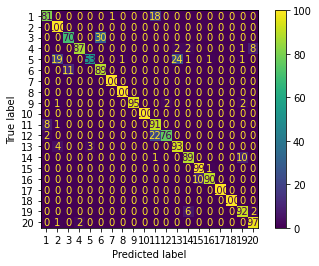

In [20]:
disp.plot()